<a id=section1></a>
## 1. Problem Statement

Use basics understanding of Pandas,matplotlib and Seaborn and the basic commands of (EDA) which includes cleaning, munging, combining, reshaping, slicing, dicing, and transforming data for analysis purpose.

Exploratory Data Analysis on 'New Car Sales' data Analyzing the car sales data with :
Finding patterns in Data
Determining relationships in Data
Checking of assumptions

<br> 

<a id=section2></a>
## 2. Importing Packages

In [51]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)         # To display all the data in each column
pd.set_option('display.max_columns', None)          # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

In [3]:
# Install and update plotly using this command to the latest version (higher than version 4.0.0)

#!pip install plotly --upgrade

Requirement already up-to-date: plotly in d:\programdata\anaconda3\lib\site-packages (4.9.0)


In [6]:
# Making plotly specific imports

# pip install chart-studio

'''
# If you're using an older version of plotly, you might have to import the below modules as well.
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)
'''

import plotly.graph_objs as go

<a id=section3></a>
## 3. Loading Data

In this **Data Visualization** sheet we are using datasets about **Car Sale's**. 

- 1. The dataset consists of the information about different car sales in over a period of time. Various variables present in the dataset includes data of car, model, price, drive etc.
- 2. The dataset comprises of 9576 observations of 10 columns. Below is a table showing names of all the columns and their description.


| Column Name	            |   Description
| ------------------------- | ---------------------
| car                       |   Car brand name
| model	                    |   Available car different Variants
| year	                    |   purchasing Year
| body	                    |   Body type-Hatchback, Sedan, Crossover etc
| mileage	                |   car Mileage
| engV	                    |   Engine version
| engType	                |   Car Fuel type - Petrol, Diesel, gas etc
| drive	Wheel               |   Drive Front, back
| registration	            |   Check if the vechile is registered
| price	                    |   Price of Car in $

### Importing 1st Dataset

In [3]:


#df_cars = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv',encoding='latin-1')
#df_cars.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [52]:
# Importing the 1st dataset (Information about different car sales).
car_sales = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv", encoding='cp1252') 
car_sales.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [54]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9142 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9065 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


- ```info``` function gives us the following insights into the df_store dataframe:

  - There are a total of **9576 samples (rows)** and **10 columns** in the dataframe.
  
  - There are **4 columns** with a **numeric** datatype and **6 columns** with an **object** datatype.
  
  - There are **missing** values in the **engV**,**drive** column.

In [55]:
car_sales.describe(include='all')

,car,price,body,mileage,engV,engType,registration,year,model,drive
count,9576,9576.000000,9576,9576.000000,9142.000000,9576,9576,9576.000000,9576,9065
unique,87,NaN,6,NaN,NaN,4,2,NaN,888,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,E-Class,front
freq,936,NaN,3646,NaN,NaN,4379,9015,NaN,199,5188
mean,NaN,15633.317316,NaN,138.862364,2.646344,NaN,NaN,2006.605994,NaN,NaN
std,NaN,24106.523436,NaN,98.629754,5.927699,NaN,NaN,7.067924,NaN,NaN
min,NaN,0.000000,NaN,0.000000,0.100000,NaN,NaN,1953.000000,NaN,NaN
25%,NaN,4999.000000,NaN,70.000000,1.600000,NaN,NaN,2004.000000,NaN,NaN
50%,NaN,9200.000000,NaN,128.000000,2.000000,NaN,NaN,2008.000000,NaN,NaN
75%,NaN,16700.000000,NaN,194.000000,2.500000,NaN,NaN,2012.000000,NaN,NaN


- ```describe``` function gives us the following insights into the data:
  
  - Cars with **Body Type - Sedan**, **engine Type as Petrol**, **model as E-Class** and **drive as front** are maximum in the dataset.

  - The distribution of **Price** is **positive (right) skewed** because the **mean** of **Price (15633.317316)** lies to the **right** of the **median(50%)** value **(9200.000000)**, on a **distribution plot**. 
  
  - The **max** value of **Mileage (999.000000)** is an **outlier** because it lie far away from the mean.
  

<a id=section302></a>
### 3.1 Pandas Profiling before Data Preprocessing

- Here, we will perform **Pandas Profiling before preprocessing** our dataset, so we will name the **output file** as __profiling_before_preprocessing.html__. 


- The file will be stored in the directory of your notebook. Open it using the jupyter notebook file explorer and take a look at it and see what insights you can develop from it. 


- Or you can **output the profiling report** in the **current jupyter notebook** as well as shown in the code below. 

In [18]:
# To install pandas profiling please run this command.

#!pip install pandas-profiling --upgrade

  Using cached pandas_profiling-2.9.0-py2.py3-none-any.whl (258 kB)
  Using cached tangled_up_in_unicode-0.0.6-py3-none-any.whl (3.1 MB)
Processing c:\users\raju\appdata\local\pip\cache\wheels\70\e1\52\5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655\htmlmin-0.1.12-py3-none-any.whl
  Using cached phik-0.10.0-py3-none-any.whl (599 kB)
  Using cached tqdm-4.48.2-py2.py3-none-any.whl (68 kB)
  Using cached seaborn-0.10.1-py3-none-any.whl (215 kB)
  Using cached matplotlib-3.3.1-1-cp37-cp37m-win_amd64.whl (8.9 MB)
  Using cached visions-0.5.0-py3-none-any.whl (64 kB)
  Using cached missingno-0.4.2-py3-none-any.whl (9.7 kB)
Processing c:\users\raju\appdata\local\pip\cache\wheels\16\72\b0\e5be34699908d9ff25dcb3debbb717987b766af61bbddffdfe\imagehash-4.1.0-py2.py3-none-any.whl
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
  Attempting uninstall: tqdm
    Found existing in

ERROR: matplotlib 3.3.1 has requirement certifi>=2020.06.20, but you'll have certifi 2019.11.28 which is incompatible.


In [5]:
import pandas_profiling

In [7]:
profile = car_sales.profile_report(title="McDonald's Profiling before Data Preprocessing", progress_bar=False, minimal=True)
profile.to_file(output_file="car_sales_profiling_before_preprocessing.html")

Text(0.5, 1.0, 'Bar Chart showing the Number of Items in each Category value [Manu]')

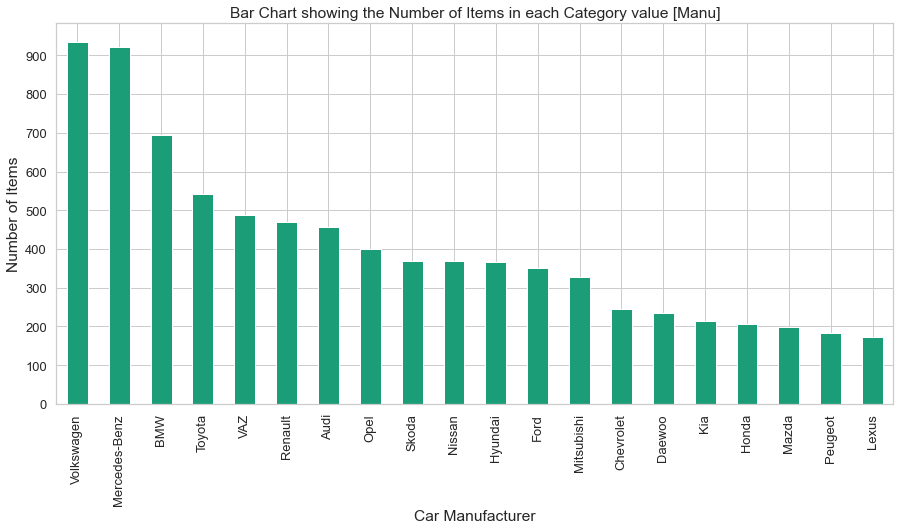

In [6]:
# Using pandas plot.bar function to plot the bar chart for the Category column [Car] of the dataframe car_sales.
car_sales['car'].value_counts().head(20).plot.bar(figsize=(15,7), colormap='Dark2', fontsize=13, yticks=np.arange(0, 1000, 100))

# Using matplotlib to add labels and title to the plot. 
# Pandas and matplotlib are linked with each other in the notebook by the use of this line in the Imports: %matplotlib inline

plt.xlabel('Car Manufacturer')
plt.ylabel('Number of Items')
plt.title('Bar Chart showing the Number of Items in each Category value [Manu]')



Text(0.5, 1.0, 'Bar Chart showing the Number of Items in each Category value [Body]')

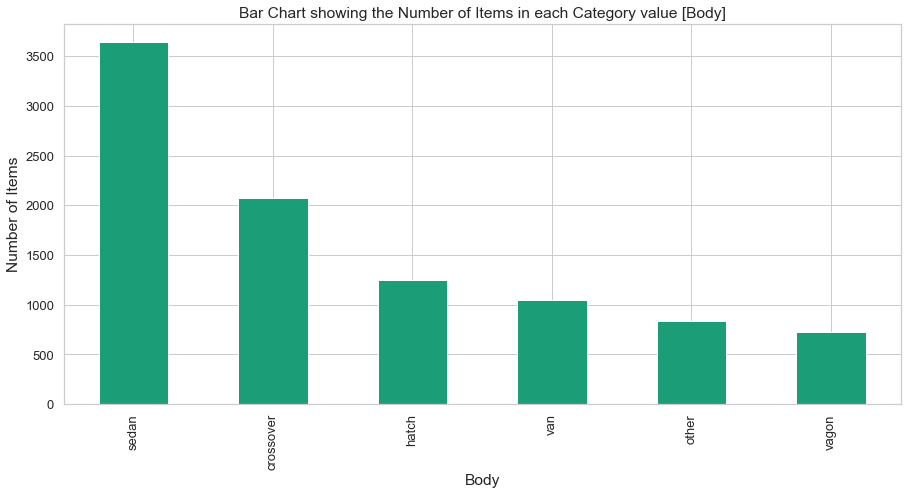

In [8]:
# Using pandas plot.bar function to plot the bar chart for the Category column [Body] of the dataframe car_sales.
car_sales['body'].value_counts().plot.bar(figsize=(15,7), colormap='Dark2', fontsize=13, yticks=np.arange(0, 4000, 500))

# Using matplotlib to add labels and title to the plot. 
# Pandas and matplotlib are linked with each other in the notebook by the use of this line in the Imports: %matplotlib inline

plt.xlabel('Body')
plt.ylabel('Number of Items')
plt.title('Bar Chart showing the Number of Items in each Body Type.')

Text(0.5, 1.0, 'Histogram showing the distribution of Serve Size values')

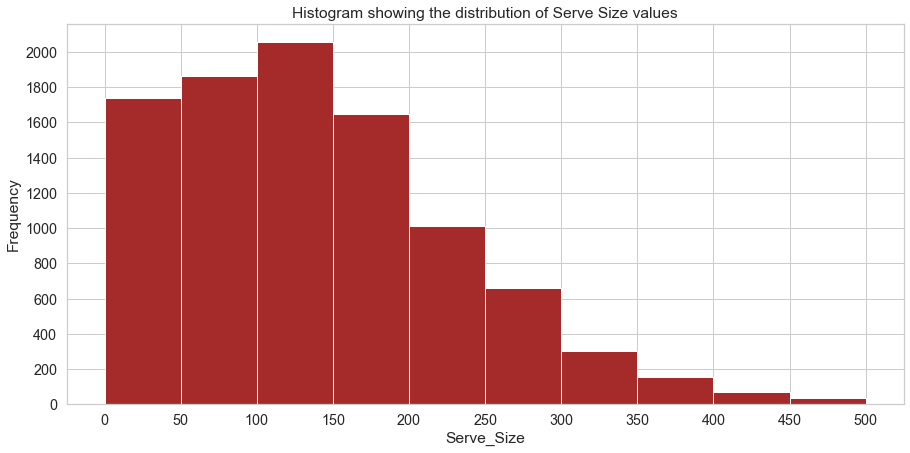

In [13]:
# Using pandas plot function to plot the histogram for the Serve_Size column.
# Using the kind='hist' to plot a histogram.

bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
car_sales['mileage'].plot(kind='hist', bins = bins, figsize=(15, 7), color='brown', yticks=np.arange(0, 2200, 200), xticks=bins)

plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.title('Histogram showing the distribution of Mileage values')

Text(0.5, 1.0, 'Bar Chart showing the Number of Items in each Category value [Body]')

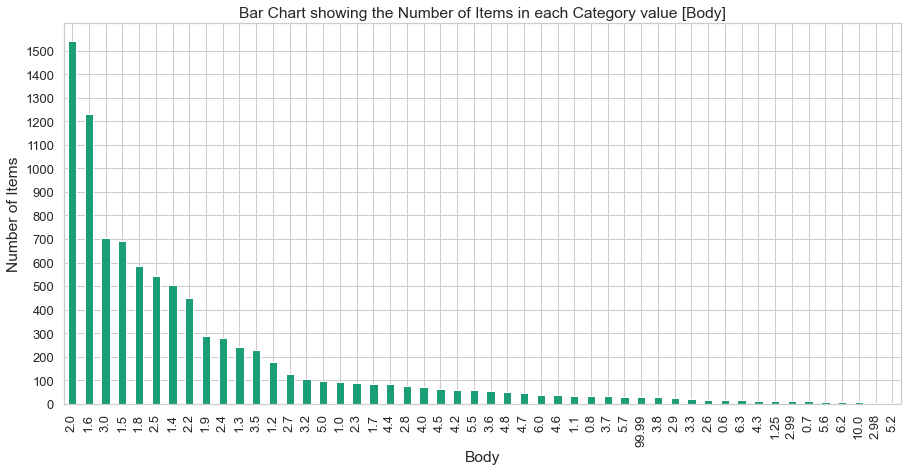

In [17]:
# Using pandas plot.bar function to plot the bar chart for the Category column [Body] of the dataframe car_sales.
car_sales['engV'].value_counts().head(50).plot.bar(figsize=(15,7), colormap='Dark2', fontsize=13, yticks=np.arange(0, 1600, 100))

# Using matplotlib to add labels and title to the plot. 
# Pandas and matplotlib are linked with each other in the notebook by the use of this line in the Imports: %matplotlib inline

plt.xlabel('Engine Version')
plt.ylabel('Number of Items')
plt.title('Bar Chart showing the Number of Items in each Engine Version value')

Text(0.5, 1.0, 'Bar Chart showing the Number of Items in each Category value [Body]')

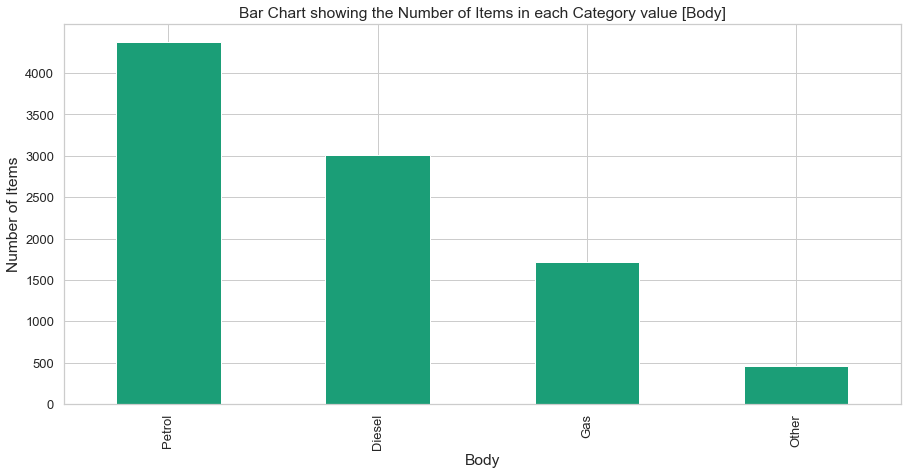

In [20]:
# Using pandas plot.bar function to plot the bar chart for the Category column [Body] of the dataframe car_sales.
car_sales['engType'].value_counts().plot.bar(figsize=(15,7), colormap='Dark2', fontsize=13, yticks=np.arange(0, 4500, 500))

# Using matplotlib to add labels and title to the plot. 
# Pandas and matplotlib are linked with each other in the notebook by the use of this line in the Imports: %matplotlib inline

plt.xlabel('Body')
plt.ylabel('Number of Items')
plt.title('Bar Chart showing the Number of Items in each Engine Type')

Text(0.5, 1.0, 'Bar Chart showing the Number of Items in each Model')

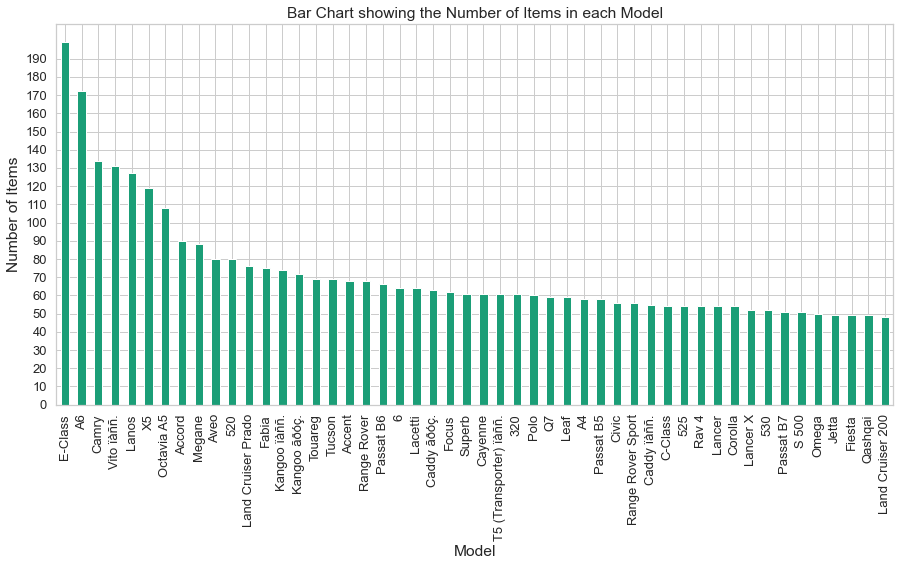

In [27]:
# Using pandas plot.bar function to plot the bar chart for the Category column [Body] of the dataframe car_sales.
car_sales['model'].value_counts().head(50).plot.bar(figsize=(15,7), colormap='Dark2', fontsize=13, yticks=np.arange(0, 200, 10))

# Using matplotlib to add labels and title to the plot. 
# Pandas and matplotlib are linked with each other in the notebook by the use of this line in the Imports: %matplotlib inline

plt.xlabel('Model')
plt.ylabel('Number of Items')
plt.title('Bar Chart showing the Number of Items in each Model')

Text(0.5, 1.0, 'Bar Chart showing the Number of Items in each Drive Type')

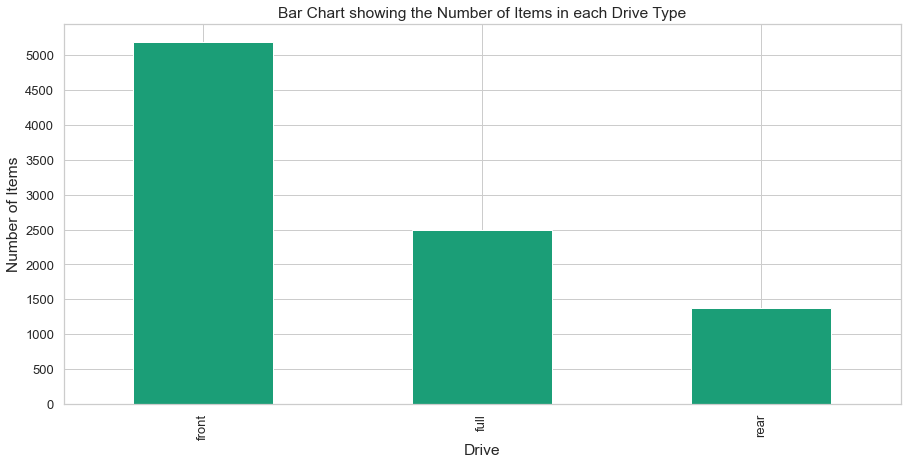

In [29]:
# Using pandas plot.bar function to plot the bar chart for the Category column [Body] of the dataframe car_sales.
car_sales['drive'].value_counts().plot.bar(figsize=(15,7), colormap='Dark2', fontsize=13, yticks=np.arange(0, 5500, 500))

# Using matplotlib to add labels and title to the plot. 
# Pandas and matplotlib are linked with each other in the notebook by the use of this line in the Imports: %matplotlib inline

plt.xlabel('Drive')
plt.ylabel('Number of Items')
plt.title('Bar Chart showing the Number of Items in each Drive Type')

**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables: 10
- Number of observations: 9576
- Missing cells: 945 (1.0%)

__Variables types__: 
- Numeric = 4
- Categorical = 5
- Bool = 1


- **Car** has a **high cardinality (87 distinct values)**.


- **Body** has **6 distinct values**.


- **Mileage** is **slightly right sckewed** as  **mean(138.8623642) greater than median(128)**.


- **engV** has **434 (4.5%)** missing values	


- **Engine Type** has **4** distinct values.


- **Model** has a **high cardinality (888 distinct values)**


- **Drive ** is **categorical variable** with **3 distinct values** .





<a id=section4></a>
## 4. Data Preprocessing

<a id=section401></a>
### 4.1 Data Preprocessing

- Here we will perform **Data Preprocessing** on our dataset, to make the data usable for **EDA**.


- In order to avoid any errors, please run **Pandas Profiling** before running the code below.

In [31]:
car_sales.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [44]:
#car_sales[car_sales['price']==0].count()
car_sales[car_sales['price']==0]

,car,price,body,mileage,engV,engType,registration,year,model,drive
20,Land Rover,0.0,crossover,0,4.4,Diesel,yes,2016,Range Rover,full
53,Mercedes-Benz,0.0,crossover,0,3.0,Diesel,yes,2016,GLE-Class,full
70,Mercedes-Benz,0.0,crossover,0,3.0,Diesel,yes,2016,GLE-Class,full
71,Toyota,0.0,crossover,0,4.5,Diesel,yes,2016,Land Cruiser 200,full
90,Porsche,0.0,sedan,22,4.8,Petrol,yes,2014,Panamera,full
...,...,...,...,...,...,...,...,...,...,...
9019,Toyota,0.0,hatch,76,1.0,Petrol,yes,2007,Aygo,front
9025,Mercedes-Benz,0.0,crossover,1,3.0,Petrol,yes,2016,GLE-Class,full
9036,Ford,0.0,other,1,5.0,Petrol,yes,2014,Mustang,rear
9442,Renault,0.0,vagon,137,1.9,Diesel,yes,2008,Kangoo ïàññ.,front


- We can see that column **Price** has **267** zero values.

- This will **affect our analysis** and hence, we're going to **remove** from data frame.

In [47]:

car_sales.drop(car_sales[car_sales.price == 0].index,axis=0, inplace=True)
car_sales

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN
...,...,...,...,...,...,...,...,...,...,...
9571,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front
9572,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front
9573,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full
9574,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front


drive has 511 (5.3%) missing values	
engV has 434 (4.5%) missing values	
mileage has 348 (3.6%) zeros	

- We can see that column **Drive** has **511** missing values.

- This will **affect our analysis** and hence, we're going to **remove** from data frame.

In [72]:
car_sales.drop(car_sales[car_sales['drive'].isnull()].index,axis=0, inplace=True)
car_sales

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
5,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full
...,...,...,...,...,...,...,...,...,...,...
9571,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front
9572,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front
9573,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full
9574,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front


- We can see that column **engV** has **434** missing values.

- This will **affect our analysis** and hence, we're going to **remove** from data frame.

In [78]:
car_sales.drop(car_sales[car_sales['engV'].isnull()].index,axis=0, inplace=True)
car_sales

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
5,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full
...,...,...,...,...,...,...,...,...,...,...
9571,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front
9572,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front
9573,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full
9574,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front


- We can see that column **Mileage** has **348** missing values.

- This will **affect our analysis** and hence, we're going to **remove** from data frame.

In [86]:
car_sales.drop(car_sales[car_sales['mileage'].isnull()].index,axis=0, inplace=True)
car_sales.drop(car_sales[car_sales['mileage']==0].index,axis=0, inplace=True)
car_sales

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
5,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full
...,...,...,...,...,...,...,...,...,...,...
9571,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front
9572,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front
9573,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full
9574,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front


In [88]:
car_sales.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
5,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full


<a id=section402></a>
### 4.2 Pandas Profiling after Data Preprocessing

- Here, we will perform **Pandas Profiling after preprocessing** our dataset, so we will name the **output file** as __profiling_after_preprocessing.html__.

In [87]:
profile = car_sales.profile_report(title="McDonald's Profiling after Data Preprocessing", progress_bar=False, minimal=True)
profile.to_file(output_file="car_sales_profiling_after_preprocessing.html")

**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
    -Number of variables	11
    -Number of observations	8213
    -Missing cells	0

__Variables types__:
    - Numeric = 5
    - Categorical = 5
    - Bool = 1

    

<a id=section5></a>
## 5. Exploratory Data Analysis

**Exploratory Data Analysis(EDA)** is an **approach to analyzing data sets** to **summarize** their **main characteristics**, often with **visual methods**. 


- It includes **cleaning, munging, combining, reshaping, slicing, dicing, and transforming data** for **analysis** purpose.


- The **primary goal of EDA** is to **maximize the analyst's insight into a data set** and into the **underlying structure of a data set**, while **providing all of the specific items** that an **analyst would want to extract from a data set**, such as:
 <br><br> 
  - A list of **outliers**.<br><br>
  
  - A **good-fitting model**.  <br><br>
  
  - **Estimates for parameters**.<br><br>
  
  - **Uncertainties** for those **estimates**.<br><br>
  
  - A **ranked list** of **important factors**.<br><br>
  
  - **Conclusions** as to whether **individual factors are statistically significant**.<br><br>
  
  - A **sense of robustness of conclusions**.<br><br>
  
  - **Optimal settings**.<br><br>